# 下载mnist数据

In [1]:
#导入keras及相关模块
import numpy as np
import  pandas as pd
from keras.utils import np_utils#导入keras.utils，因为后续要将label标签转化为One-Hot 编码
np.random.seed(10)#设置seed可以产生随机数据

Using TensorFlow backend.


In [2]:
#导入mnist模块
from keras.datasets import mnist

In [3]:
#导入mnist数据
(x_train_image, y_train_label), \
(x_test_image, y_test_label) = mnist.load_data()

In [4]:
#查看数据集项数
print('train data=',len(x_train_image))
print('test data=',len(x_test_image))

train data= 60000
test data= 10000


# 查看训练数据

In [5]:
#训练数据由images和labels组成
print('x_train_image:', x_train_image.shape)
print('y_train_label:', y_test_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (10000,)


In [6]:
## 定义plot_image函数显示数字图像
import matplotlib.pyplot as plt
def plot_image(image):#定义函数，将image作为参数
    #设置显示图形的大小
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    #使用plt.imshow显示图像，传入参数image是28*28的图形，camp参数设置为binary，以黑白灰度显示
    plt.imshow(image, cmap = 'binary')
    #开始绘图
    plt.show()

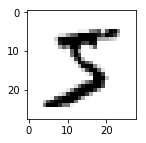

In [7]:
#执行plot_image函数查看第0个图像
plot_image(x_train_image[0])

In [8]:
#查看第0项的label
y_train_label[0]

5

# 查看多项训练数据的images和labels

In [9]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num = 10):
#函数的参数分别是images（数字图像），labels（真实值），prediction（预测结果），idx(开始显示的数据index)，num(要显示的数据项数，默认是10.不超过25)
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        #绘制图形
        ax = plt.subplot(5, 5, i + 1)
        ax.imshow(images[idx], cmap = 'binary')
        title = 'label=' + str(labels[idx])#设置标题
        if len(prediction)>0:#如果传入了预测结果
            title+= ',predict=' + str(prediction[idx])#标题
        
        ax.set_title(title, fontsize = 10)#设置子图形标题
        ax.set_xticks([]);ax.set_yticks([])#设置不显示刻度
        idx+=1#读取下一项
    plt.show()

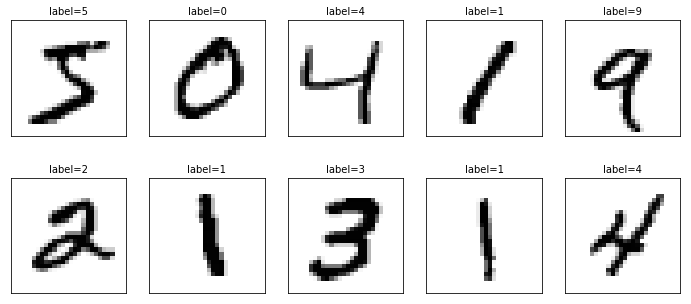

In [11]:
#查看训练数据的前10项
plot_images_labels_prediction(x_train_image, y_train_label, [], 0, 10)

In [34]:
#查看测试数据
print('x_test_image:', x_test_image.shape)
print('y_test_label:', y_test_label.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


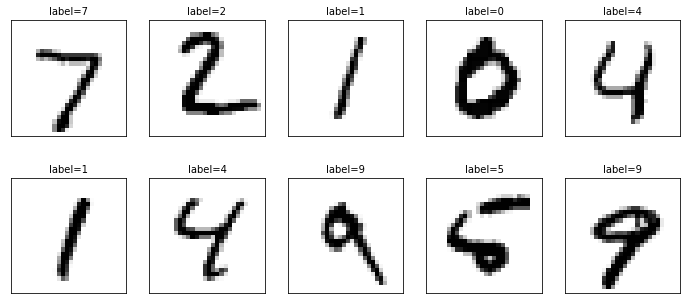

In [35]:
#显示测试数据的前10项
plot_images_labels_prediction(x_test_image, y_test_label, [], 0, 10)

# features数据预处理 

In [ ]:
#查看image和shape
print('x_train_image:', x_train_image.shape)
print('y_train_label:', y_train_label.shape)

In [37]:
#将image用reshape转换，并用astype转换为float型，总共784个浮点数
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [38]:
print('x_train:', x_Train.shape)
print('x_test:', x_Test.shape)

x_train: (60000, 784)
x_test: (10000, 784)


In [39]:
#查看第0项的内容
x_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [40]:
#将数字图像image标准化
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [41]:
x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# label数据预处理

In [42]:
#查看原来的前五个label标签字段
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [43]:
#将标签转化为One—Hot编码
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

In [44]:
#查看转化后前五个的One_Hot编码
y_TrainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)